# Exercise 4.10 Part 1

## Contents

#### 01. Import data and libraries
#### 02. Address PII and security
#### 03. Regional segmentation and behavioral analysis
#### 04. Exclude low-activity customers
#### 05. Create customer profiles
#### 06. Visualizations of profiles
#### 07. Aggregate the max, mean, and min
#### 08. Compare customer profiles with regions and departments
#### 09. Export final data set

## 01. Import data and libraries

In [4]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [5]:
# Import data

ords_prods_cust = pd.read_pickle(r'C:\Users\lrutl\OneDrive\Desktop\Python Fundamentals for Data Analysts\Instacart Basket Analysis\02 Data\Prepared Data\ords_prods_cust.pkl')

In [6]:
# Create file path

path = r'C:\Users\lrutl\OneDrive\Desktop\Python Fundamentals for Data Analysts\Instacart Basket Analysis'

In [7]:
# Check data import head

ords_prods_cust.head()

,order_id,customer_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Age,number_of_dependants,fam_status,income,Region,Activity_Flag,parent_profile,department_profile,income_profile,Income Level
3,431534,1,5,4,15,28.0,196,1,1,Soda,...,31,3,married,40423,South,High_Activity,Young Parent,non-alcoholic beverages,Middle Income,Middle Income
4,3367565,1,6,2,7,19.0,196,1,1,Soda,...,31,3,married,40423,South,High_Activity,Young Parent,non-alcoholic beverages,Middle Income,Middle Income
5,550135,1,7,1,9,20.0,196,1,1,Soda,...,31,3,married,40423,South,High_Activity,Young Parent,non-alcoholic beverages,Middle Income,Middle Income
6,3108588,1,8,1,14,14.0,196,2,1,Soda,...,31,3,married,40423,South,High_Activity,Young Parent,non-alcoholic beverages,Middle Income,Middle Income
7,2295261,1,9,1,16,0.0,196,4,1,Soda,...,31,3,married,40423,South,High_Activity,Young Parent,non-alcoholic beverages,Middle Income,Middle Income


In [8]:
# Check data import columns

ords_prods_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24414877 entries, 3 to 30328759
Data columns (total 35 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   order_id                        int64  
 1   customer_id                     object 
 2   order_number                    int64  
 3   orders_day_of_week              int64  
 4   order_hour_of_day               int64  
 5   days_since_prior_order          float64
 6   product_id                      int64  
 7   add_to_cart_order               int64  
 8   reordered                       int64  
 9   product_name                    object 
 10  aisle_id                        int64  
 11  department_id                   int64  
 12  prices                          float64
 13  price_range_loc                 object 
 14  busiest_day                     object 
 15  Busiest days                    object 
 16  busiest_period_of_day           object 
 17  max_order                

In [9]:
# Check data import shape

ords_prods_cust.shape

(24414877, 35)

## 02. Address PII and security

##### I removed the two columns that contained PII. They were First Name and Last Name. If individual customer information is needed, I will use the anonymous customer_id column.

## 03. Regional segmentation and behavioral analysis

In [10]:
# Define Region row

def Region(row):

  if (row['State'] == 'Maine') or (row['State'] == 'New Hampshire') or (row['State'] == 'Vermont') or (row['State'] == 'Massachusetts') or (row['State'] == 'Rhode Island') or (row['State'] == 'Connecticut') or (row['State'] == 'New York') or (row['State'] == 'Pennsylvania') or (row['State'] == 'New Jersey'):
    return 'Northeast'
  elif (row['State'] == 'Wisconsin') or (row['State'] == 'Michigan') or (row['State'] == 'Illinois') or (row['State'] == 'Indiana') or (row['State'] == 'Ohio') or (row['State'] == 'North Dakota') or (row['State'] == 'South Dakota') or (row['State'] == 'Nebraska') or (row['State'] == 'Kansas') or (row['State'] == 'Minnesota') or (row['State'] == 'Iowa') or (row['State'] == 'Missouri'):
    return 'Midwest'
  elif (row['State'] == 'Delaware') or (row['State'] == 'Maryland') or (row['State'] == 'District of Columbia') or (row['State'] == 'Virginia') or (row['State'] == 'West Virginia') or (row['State'] == 'North Carolina') or (row['State'] == 'South Carolina') or (row['State'] == 'Georgia') or (row['State'] == 'Florida') or (row['State'] == 'Kentucky') or (row['State'] == 'Tennessee') or (row['State'] == 'Mississippi') or (row['State'] == 'Alabama') or (row['State'] == 'Oklahoma') or (row['State'] == 'Texas') or (row['State'] == 'Arkansas') or (row['State'] == 'Louisiana'):
    return 'South'
  elif (row['State'] == 'Idaho') or (row['State'] == 'Montana') or (row['State'] == 'Wyoming') or (row['State'] == 'Nevada') or (row['State'] == 'Utah') or (row['State'] == 'Colorado') or (row['State'] == 'Arizona') or (row['State'] == 'New Mexico') or (row['State'] == 'Alaska') or (row['State'] == 'Washington') or (row['State'] == 'Oregon') or (row['State'] == 'California') or (row['State'] == 'Hawaii'):
    return 'West'
  else: return 'NaN'

In [11]:
# Apply Region to ords_prods_cust df

ords_prods_cust['Region'] = ords_prods_cust.apply(Region, axis=1)

In [12]:
# Review new df

ords_prods_cust.head()

,order_id,customer_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Age,number_of_dependants,fam_status,income,Region,Activity_Flag,parent_profile,department_profile,income_profile,Income Level
3,431534,1,5,4,15,28.0,196,1,1,Soda,...,31,3,married,40423,South,High_Activity,Young Parent,non-alcoholic beverages,Middle Income,Middle Income
4,3367565,1,6,2,7,19.0,196,1,1,Soda,...,31,3,married,40423,South,High_Activity,Young Parent,non-alcoholic beverages,Middle Income,Middle Income
5,550135,1,7,1,9,20.0,196,1,1,Soda,...,31,3,married,40423,South,High_Activity,Young Parent,non-alcoholic beverages,Middle Income,Middle Income
6,3108588,1,8,1,14,14.0,196,2,1,Soda,...,31,3,married,40423,South,High_Activity,Young Parent,non-alcoholic beverages,Middle Income,Middle Income
7,2295261,1,9,1,16,0.0,196,4,1,Soda,...,31,3,married,40423,South,High_Activity,Young Parent,non-alcoholic beverages,Middle Income,Middle Income


In [13]:
# Check value counts of Region column

ords_prods_cust['Region'].value_counts(dropna = False)

South        8129086
West         6258764
Midwest      5711756
Northeast    4315271
Name: Region, dtype: int64

In [14]:
# Find difference between spending by region - crosstab region with average_spending

crosstab = pd.crosstab(ords_prods_cust['Region'], ords_prods_cust['average_spending'], dropna = False)

In [15]:
crosstab

average_spending,High spender,Low spender
Region,,
Midwest,119094,5592662
Northeast,82465,4232806
South,157500,7971586
West,119911,6138853


In [16]:
# Copy crosstab to clipboard to paste in Excel

crosstab.to_clipboard()

##### Analysis of regional spending: The South region has the highest number of customers as well as the most high and low spenders. The Northeast region has the least amount of customers as well as the lowest number of high and low spenders.  The Midwest has the highest % of high spenders at 2.1% of Midwest customers.

## 04. Exclude low-activity customers

In [17]:
# Create if-statement to find low-activity customers (less than 5 orders)

ords_prods_cust.loc[ords_prods_cust['order_number'] <5,'Activity_Flag'] = 'Low_Activity'

In [18]:
# Create if-statement to find high-activity customers (5 or more orders)

ords_prods_cust.loc[ords_prods_cust['order_number'] >= 5,'Activity_Flag'] = 'High_Activity'

In [19]:
# Check frequency of new Activity_Flag column

ords_prods_cust['Activity_Flag'].value_counts(dropna=False)

High_Activity    24414877
Name: Activity_Flag, dtype: int64

In [20]:
# Create sample df of only Low_Activty customers

df_low_activity = ords_prods_cust[ords_prods_cust.Activity_Flag == 'Low_Activity']

In [21]:
# Check shape of df_low_activity

df_low_activity.shape

(0, 35)

In [22]:
# Export df_low_activity df

df_low_activity.to_pickle(os.path.join(r'C:\Users\lrutl\OneDrive\Desktop\Python Fundamentals for Data Analysts\Instacart Basket Analysis\02 Data\Prepared Data\df_low_activity.pkl'))

In [23]:
# Remove Low_Activity customers from ords_prods_cust df

ords_prods_cust = ords_prods_cust[ords_prods_cust.Activity_Flag == 'High_Activity']

In [24]:
# Check shape of new ords_prods_cust df

ords_prods_cust.shape

(24414877, 35)

## 05. Create customer profiles

In [25]:
# Create parent_profile column

ords_prods_cust['parent_profile']=""

In [26]:
ords_prods_cust.loc[((ords_prods_cust['Age'] <= 40) & (ords_prods_cust['number_of_dependants'] >= 1)), 'parent_profile'] = 'Young Parent'

In [27]:
ords_prods_cust.loc[((ords_prods_cust['Age'] > 40) & (ords_prods_cust['number_of_dependants'] >= 1)), 'parent_profile'] = 'Senior Parent'

In [28]:
ords_prods_cust.loc[((ords_prods_cust['Age'] > 40) & (ords_prods_cust['number_of_dependants'] < 1 )), 'parent_profile'] = 'Senior, No Dependants'

In [29]:
ords_prods_cust.loc[((ords_prods_cust['Age'] <= 40) & (ords_prods_cust['number_of_dependants'] < 1 )), 'parent_profile'] = 'Young, No Dependants'

In [30]:
# Check frequencies of parent_profile column

ords_prods_cust['parent_profile'].value_counts(dropna=False)

Senior Parent            11696127
Young Parent              6613748
Senior, No Dependants     3919058
Young, No Dependants      2185944
Name: parent_profile, dtype: int64

In [31]:
# Create new income_profile column

ords_prods_cust['income_profile']=""

In [32]:
ords_prods_cust.loc[(ords_prods_cust['income'] < 40000), 'income_profile'] = 'Low Income'

In [33]:
ords_prods_cust.loc[(ords_prods_cust['income'] >= 40000) & (ords_prods_cust['income'] <= 100000), 'income_profile'] = 'Middle Income'

In [34]:
ords_prods_cust.loc[(ords_prods_cust['income'] > 100000), 'income_profile'] = 'High Income'

In [35]:
# Check frequencies of income_profile column

ords_prods_cust['income_profile'].value_counts(dropna=False)

Middle Income    11949316
High Income      11225709
Low Income        1239852
Name: income_profile, dtype: int64

In [36]:
# Define department_profile row

def department_profile(row):

  if (row['department_id'] == 5):
    return 'alcohol order'
  elif (row['department_id'] == 8):
    return 'pet order'
  elif (row['department_id'] == 18):
    return 'baby order'
  elif (row['department_id'] == 19):
    return 'snack order'
  elif (row['department_id'] == 7):
    return 'non-alcoholic beverages'
  else: return 'other'

In [37]:
# Apply department_profile to ords_prods_cust df

ords_prods_cust['department_profile'] = ords_prods_cust.apply(department_profile, axis=1)

In [38]:
# Check value counts of department_profile column

ords_prods_cust['department_profile'].value_counts(dropna = False)

other                      19675279
snack order                 2187121
non-alcoholic beverages     2036447
baby order                   335947
alcohol order                107972
pet order                     72111
Name: department_profile, dtype: int64

## 06. Visualizations of profiles

In [39]:
# Count of customer_id in each department profile

df_department_profile = ords_prods_cust.groupby('department_profile').agg({'customer_id':['nunique']})

In [40]:
# Check columns of new df_department_profile

df_department_profile.head()

,customer_id
,nunique
department_profile,
alcohol order,9988
baby order,25771
non-alcoholic beverages,129324
other,161154
pet order,10845


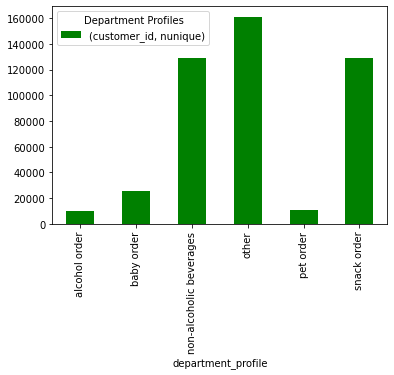

In [41]:
# Create bar chart for department_profile

department_profile_bar = df_department_profile.plot.bar(color = ['green'])
plt.legend(title='Department Profiles')

In [42]:
# Export department_profile_bar as image file to Visualizations folder

department_profile_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'department_profile_bar.png'))

In [43]:
# Count of customer_id in each parent profile

df_parent_profile = ords_prods_cust.groupby('parent_profile').agg({'customer_id':['nunique']})

In [44]:
# Check columns of new df_parent_profile

df_parent_profile.head()

,customer_id
,nunique
parent_profile,
Senior Parent,78444
"Senior, No Dependants",25999
Young Parent,43460
"Young, No Dependants",14728


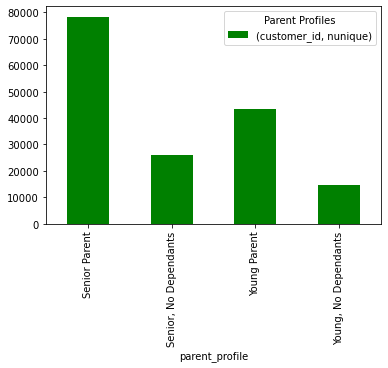

In [45]:
# Create bar chart for parent_profile

parent_profile_bar = df_parent_profile.plot.bar(color = ['green'])
plt.legend(title='Parent Profiles')

In [46]:
# Export parent_profile_bar as image file to Visualizations folder

parent_profile_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'parent_profile_bar.png'))

In [47]:
# Count of customer_id in each income profile

df_income_profile = ords_prods_cust.groupby('income_profile').agg({'customer_id':['nunique']})

In [48]:
# Check columns of new df_income_profile

df_income_profile.head()

,customer_id
,nunique
income_profile,
High Income,70080
Low Income,12625
Middle Income,79926


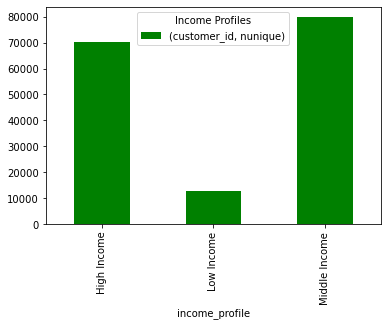

In [49]:
# Create bar chart for income_profile

income_profile_bar = df_income_profile.plot.bar(color=['green'])
plt.legend(title='Income Profiles')

In [50]:
# Export income_profile_bar as image file to Visualizations folder

income_profile_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_profile_bar.png'))

## 07. Aggregate the max, mean, and min

In [51]:
# Department_profiles by prices

ords_prods_cust.groupby('department_profile').agg({'prices':['max','min','mean','median']})

prices                      
                           max  min      mean median
department_profile                                  
alcohol order             15.0  1.0  8.163218    7.5
baby order                15.0  1.0  7.619636    7.2
non-alcoholic beverages   15.0  1.0  7.693774    7.7
other                     25.0  1.0  8.192130    8.2
pet order                 15.0  1.0  7.881774    7.6
snack order                7.0  1.6  4.274953    4.2

##### This shows the median price of pet orders is the highest, followed my alcohol. These departments may net more spend per customer.

In [52]:
# Department_profiles by orders_day_of_week

ords_prods_cust.groupby('department_profile').agg({'orders_day_of_week':['max','min','mean','median']})

orders_day_of_week                     
                                       max min      mean median
department_profile                                             
alcohol order                            6   0  3.168942      3
baby order                               6   0  2.717973      3
non-alcoholic beverages                  6   0  2.810068      3
other                                    6   0  2.737876      3
pet order                                6   0  2.932590      3
snack order                              6   0  2.758467      3

##### This shows people are more likely to purchase alcohol on Tuesdays.

In [53]:
# Income_profiles by prices

ords_prods_cust.groupby('income_profile').agg({'prices':['max','min','mean','median']})

prices                      
                  max  min      mean median
income_profile                             
High Income      25.0  1.0  7.949013    7.6
Low Income       25.0  1.0  6.504960    5.8
Middle Income    25.0  1.0  7.775371    7.4

##### This shows high and middle income customers purchase more expensive items

In [54]:
# Income_profiles by orders_day_of_week

ords_prods_cust.groupby('income_profile').agg({'orders_day_of_week':['max','min','mean','median']})

orders_day_of_week                     
                              max min      mean median
income_profile                                        
High Income                     6   0  2.756372      3
Low Income                      6   0  2.740514      3
Middle Income                   6   0  2.740809      3

##### This shows there is no significant difference between income levels and the day of week they place orders

In [55]:
# Parent_profiles by orders_day_of_week

ords_prods_cust.groupby('parent_profile').agg({'orders_day_of_week':['max','min','mean','median']})

orders_day_of_week                     
                                     max min      mean median
parent_profile                                               
Senior Parent                          6   0  2.754553      3
Senior, No Dependants                  6   0  2.749069      3
Young Parent                           6   0  2.742100      3
Young, No Dependants                   6   0  2.728309      3

##### This shows there is no significant difference between parent profiles and the day of week they place orders

In [56]:
# Parent_profiles by prices

ords_prods_cust.groupby('parent_profile').agg({'prices':['max','min','mean','median']})

prices                      
                         max  min      mean median
parent_profile                                    
Senior Parent           25.0  1.0  7.792250    7.4
Senior, No Dependants   25.0  1.0  7.795595    7.4
Young Parent            25.0  1.0  7.787591    7.4
Young, No Dependants    25.0  1.0  7.782726    7.4

##### This shows there is no significant difference between parent profiles and the price of items they order

## 08. Compare customer profiles with regions and departments

In [57]:
# Department_profile by region

crosstab_department_profile_region = pd.crosstab(ords_prods_cust['Region'],ords_prods_cust['department_profile'], dropna=False )

In [58]:
crosstab_department_profile_region

department_profile,alcohol order,baby order,non-alcoholic beverages,other,pet order,snack order
Region,,,,,,
Midwest,25567,78496,472243,4609821,16481,509148
Northeast,18534,59555,367868,3465501,14080,389733
South,36253,113970,680594,6550290,23012,724967
West,27618,83926,515742,5049667,18538,563273


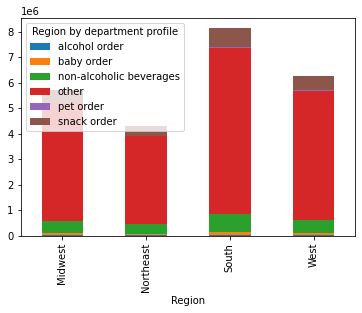

In [59]:
# Department_profile by region stacked bar chart

department_profile_region_stacked_bar = department_profile_region_stacked_bar = crosstab_department_profile_region.plot.bar(stacked = True)
plt.legend(title='Region by department profile')

In [60]:
# Export department_profile_region_stacked_bar as image file to Visualizations folder

department_profile_region_stacked_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'department_profile_region_stacked_bar.png'))

In [61]:
# Parent_profile by region

crosstab_parent_profile_region = pd.crosstab(ords_prods_cust['Region'],ords_prods_cust['parent_profile'], dropna=False )

In [62]:
crosstab_parent_profile_region

parent_profile,Senior Parent,"Senior, No Dependants",Young Parent,"Young, No Dependants"
Region,,,,
Midwest,2744172,927872,1530623,509089
Northeast,2089554,681503,1160579,383635
South,3854266,1292851,2236486,745483
West,3008135,1016832,1686060,547737


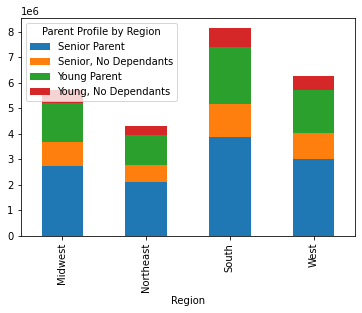

In [63]:
# Parent_profile by region stacked bar chart

parent_profile_region_stacked_bar = crosstab_parent_profile_region.plot.bar(stacked = True)
plt.legend(title='Parent Profile by Region')

In [64]:
# Export parent_profile_region_stacked_bar as image file to Visualizations folder

parent_profile_region_stacked_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'parent_profile_region_stacked_bar.png'))

In [65]:
# Parent_profile by department

crosstab_parent_profile_department = pd.crosstab(ords_prods_cust['department_id'],ords_prods_cust['parent_profile'], dropna=False )

In [66]:
crosstab_parent_profile_department

parent_profile,Senior Parent,"Senior, No Dependants",Young Parent,"Young, No Dependants"
department_id,,,,
1,781084,263982,441017,141531
2,12859,4391,7372,2544
3,423562,142324,238169,79275
4,3456721,1162611,1957485,650274
5,49455,18157,30558,9802
6,93807,31930,54055,18108
7,983160,328160,541232,183895
8,34453,11715,19408,6535
9,303807,101336,172504,56078


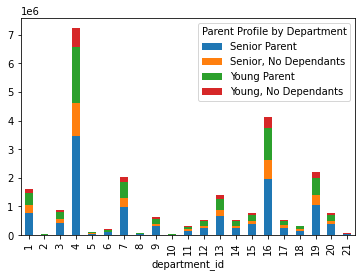

In [67]:
# Parent_profile by department stacked bar chart

parent_profile_department_stacked_bar = crosstab_parent_profile_department.plot.bar(stacked = True)
plt.legend(title='Parent Profile by Department')

In [68]:
# Export parent_profile_department_stacked_bar as image file to Visualizations folder

parent_profile_department_stacked_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'parent_profile_department_stacked_bar.png'))

In [69]:
# Income_profile by region

crosstab_income_profile_region = pd.crosstab(ords_prods_cust['Region'],ords_prods_cust['income_profile'], dropna=False )

In [70]:
crosstab_income_profile_region

income_profile,High Income,Low Income,Middle Income
Region,,,
Midwest,2684901,287467,2739388
Northeast,1989949,216982,2108340
South,3679956,427488,4021642
West,2870903,307915,3079946


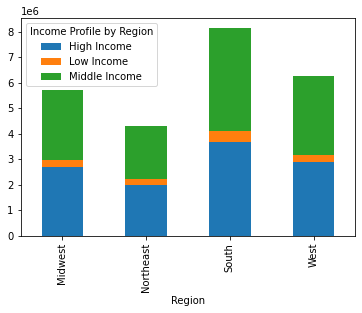

In [71]:
# Income_profile by region stacked bar chart

income_profile_region_stacked_bar = crosstab_income_profile_region.plot.bar(stacked = True)
plt.legend(title='Income Profile by Region')

In [72]:
# Export income_profile_region_stacked_bar as image file to Visualizations folder

income_profile_region_stacked_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_profile_region_stacked_bar.png'))

In [73]:
# Income_profile by department

crosstab_income_profile_department = pd.crosstab(ords_prods_cust['department_id'],ords_prods_cust['income_profile'], dropna=False )

In [74]:
crosstab_income_profile_department

income_profile,High Income,Low Income,Middle Income
department_id,,,
1,762481,75687,789446
2,12518,1535,13113
3,417038,37613,428679
4,3377215,293668,3556208
5,52542,6052,49378
6,92806,7494,97600
7,894607,149568,992272
8,35242,3349,33520
9,304051,21237,308437


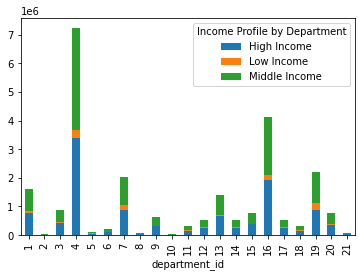

In [75]:
# Income_profile by department stacked bar chart

income_profile_department_stacked_bar = crosstab_income_profile_department.plot.bar(stacked = True)
plt.legend(title='Income Profile by Department')

In [76]:
# Export income_profile_department_stacked_bar as image file to Visualizations folder

income_profile_department_stacked_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_profile_department_stacked_bar.png'))

In [81]:
# All departments by region

crosstab_all_departments_region = pd.crosstab(ords_prods_cust['department_id'],ords_prods_cust['Region'], dropna=False )

In [82]:
crosstab_all_departments_region

Region,Midwest,Northeast,South,West
department_id,,,,
1,381094,283259,545809,417452
2,6284,4932,9200,6750
3,205374,157635,292772,227549
4,1695851,1269360,2409221,1852659
5,25567,18534,36253,27618
6,46607,34491,65417,51385
7,472243,367868,680594,515742
8,16481,14080,23012,18538
9,148529,110708,210680,163808


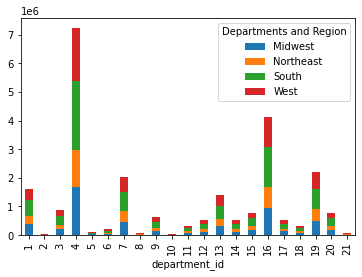

In [83]:
# All departments by region stacked bar chart

all_departments_region_stacked_bar = crosstab_all_departments_region.plot.bar(stacked = True)
plt.legend(title='Departments and Region')

## 09. Export final data set

In [ ]:
# Export ords_prods_cust to Prepared data folder

ords_prods_cust.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust.pkl'))